In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
pd.set_option('display.max_columns', None, 'max_colwidth', 250)

import string
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords 

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

from sklearn.compose import ColumnTransformer
from sklearn.pipeline import FeatureUnion

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\gravi\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
# reading in csv
reddit = pd.read_csv('sample_comments.csv', index_col=[0])

In [3]:
# verification
reddit.head()

,label,comment
139484,0,Nope.
638093,0,Donde esta la biblioteca?
662570,0,I feel bad for the mummy... not even the minions want to get close to him :(
652534,1,"The Pirate Bay, of course!"
411846,1,That's exactly how multiple photographers ended up on the pavement; they tripped.


In [4]:
# looking at random sample
reddit.sample(25, random_state=42)

,label,comment
43529,1,"""excuse me while i use my white privilege to pay the same price everyone does for a steak at the store and cook it on my white privilege stove and marinate it in my racist salt and oppressed pepper and Worcestershire sauce and cook it medium priv..."
570138,1,Big fry before voting no!
848865,0,And shoulders
882540,1,Clearly OP wanted his cards to bend
603900,1,yeah sometimes i have trouble pressing E aswell
881241,1,You can never fault a perfectly constructed argument.
795227,1,THE CHILDREN!
186891,0,"Press ""X"" to pay respects."
493704,1,Ribery is a good one
200760,1,He's not using a controller what a noob


In [5]:
# setting X and y
X = reddit['comment']
y = reddit['label']

In [6]:
# first split into test and remainder
X_remainder, X_test, y_remainder, y_test = train_test_split(X, y, test_size = 0.25, random_state=42)

In [7]:
# second split into train and validation
X_train, X_val, y_train, y_val = train_test_split(X_remainder, y_remainder, test_size = 0.25, random_state=42)

In [8]:
#instantiating stemmer and stop words
stemmer = nltk.stem.PorterStemmer()
stop_words = stopwords.words('english')

# custom tokenizer function
def tokenizer(sentence):
    
    num_range = range(0,100) # num range to loop through
    
    for num in num_range: # looping through num range to filter out numbers
        sentence = sentence.replace(str(num), '')
    
    # removing punctuation and setting to lower case
    for punctuation_mark in string.punctuation:
        sentence = sentence.replace(punctuation_mark,'').lower()
        
    
    # splitting sentence into words
    words_list = sentence.split(' ')
    
    tokens = [] # list to be filled with tokens
    
    
    # removing stopwords and any empty strings
    for word in words_list:
        if (not word in stop_words) and (word!=''):
            # Stem words
            stemmed_word = stemmer.stem(word)
            tokens.append(stemmed_word)

    return tokens

In [9]:
# instantiating count vectorizer with custom tokenizer
count_vector = CountVectorizer(min_df=25, tokenizer=tokenizer, max_features=1500, dtype=np.int8)

# fitting to train and transforming
count_vector.fit(X_train)
train_vectors = count_vector.transform(X_train)

# transforming to val and test
val_vectors = count_vector.transform(X_val)
test_vectors = count_vector.transform(X_test)

C:\Users\gravi\anaconda3\envs\sarcasm\lib\site-packages\sklearn\feature_extraction\text.py:524: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


In [10]:
# turning tokens + vectors into dataframe
train_vector_df = pd.DataFrame(columns= count_vector.get_feature_names(), data=train_vectors.toarray())

# checking result
train_vector_df.head()

C:\Users\gravi\anaconda3\envs\sarcasm\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,abil,abl,abort,absolut,abus,accept,access,accord,account,accur,across,act,action,activ,actual,ad,add,addict,admit,adult,advic,affect,afford,age,ago,agre,ah,ahead,aim,aint,air,album,alcohol,alien,aliv,allow,almost,alon,along,alreadi,alright,also,altern,alway,amaz,america,american,amirit,amount,amp,angri,anim,announc,annoy,anoth,answer,anymor,anyon,anyth,anyway,apart,app,appar,appear,appl,appli,appreci,appropri,area,arent,argu,argument,arm,armi,armor,around,arrest,art,articl,artist,asian,ask,ass,assault,asshol,assum,atheist,attack,attempt,attent,attract,australia,avail,averag,avoid,aw,awar,away,awesom,b,babi,back,bad,bag,balanc,ball,ban,bank,bar,base,basic,batteri,battl,bear,beat,beauti,becom,beer,begin,behind,believ,benefit,berni,besid,best,bet,beta,better,big,bigger,biggest,bike,bill,bit,bitch,black,blame,blind,block,blood,blow,blue,board,bodi,bomb,book,boot,bore,born,boss,bot,bother,bottl,bottom,bought,bowl,box,boy,brain,brand,break,bring,british,bro,broke,broken,brother,brought,brown,buddi,buff,bug,build,built,bullet,bullshit,bunch,burn,bush,busi,butt,button,buy,c,call,came,camera,camp,campaign,canada,canadian,cancer,candid,cannot,cant,cap,capit,car,card,care,career,carri,case,cash,casual,cat,catch,caught,caus,center,certain,certainli,challeng,champion,chanc,chang,channel,charact,charg,cheap,cheat,check,chees,chicken,child,children,china,chines,choic,choos,christian,christma,church,citi,citizen,civil,claim,class,classic,clean,clear,clearli,click,clinton,close,cloth,club,coach,code,cold,collect,colleg,color,come,comic,comment,commi,commit,common,commun,communist,compani,compar,competit,complain,complet,comput,concern,confirm,confus,connect,conserv,consid,consol,conspiraci,construct,content,continu,contract,contribut,control,convers,convinc,cool,cop,copi,corner,corpor,correct,corrupt,cost,could,couldnt,count,countri,coupl,cours,court,cover,crap,crash,crazi,creat,credit,creepi,cri,crime,crimin,critic,cross,cultur,cup,current,custom,cut,cute,cuz,da,dad,daili,damag,damn,danger,dare,dark,dat,data,date,day,de,dead,deal,death,debat,decent,decid,decis,deck,deep,defend,defens,definit,degre,delet,demand,democraci,democrat,depend,depress,deserv,design,destroy,develop,dick,didnt,die,differ,difficult,direct,dirti,disagre,discuss,disgust,dlc,doctor,doesnt,dog,dollar,donald,donat,done,dont,door,doubl,doubt,download,downvot,draft,dragon,draw,dream,dress,drink,drive,driver,drop,drug,drunk,dude,due,duh,dumb,dunno,e,earli,earth,easi,easier,easili,east,eat,econom,economi,edit,educ,effect,effort,egg,eh,either,elect,els,em,email,emot,employe,end,enemi,energi,engin,english,enjoy,enough,entir,episod,equal,especi,etc,eu,europ,european,even,event,ever,everi,everybodi,everyon,everyth,everywher,evid,evil,exact,exactli,exampl,excel,except,excit,exclus,excus,exist,expect,expens,experi,expert,explain,extra,extrem,eye,f,face,facebook,fact,fail,fair,faith,fake,fall,fals,famili,fan,fantast,far,farm,fast,faster,fat,father,fault,favorit,fear,featur,feed,feel,felt,femal,feminist,field,fight,figur,file,fill,film,filthi,final,find,fine,finger,finish,fire,first,fit,five,fix,flag,flair,fli,flip,folk,follow,food,footbal,forc,foreign,forev,forget,forgot,form,forward,found,four,fox,fp,frame,free,freedom,french,friend,front,fuck,fuckin,full,fun,fund,funni,futur,g,ga,gain,game,garbag,gave,gay,gb,gear,gender,gener,german,germani,get,giant,gif,girl,girlfriend,give,given,glad,glass,global,go,goal,god,goe,gold,gone,gonna,good,googl,got,gotta,gotten,govern,grab,graphic,great,greatest,green,ground,group,grow,guess,guilti,gun,guy,ha,hack,haha,hair,half,hand,handl,hang,happen,happi,hard,harder,hasnt,hat,hate,havent,he,head,health,healthi,hear,heard,heart,heat,hed,hell,help,hero,hey,hide,high,higher,hilari,hillari,hire,histori,hit,hitler,hmm,hold,hole,holi,home,honest,honestli,hope,horribl,hot,hour,hous,huge,huh,human,hurt,hype,ice,id,idea,idiot,idk,ignor,ill,illeg,im,imag,imagin,immedi,immigr,imo,impli,import,imposs,impress,improv,includ,increas,incred,inde,individu,industri,in

In [11]:
# verifying shape and checking memory usage
train_vector_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142131 entries, 0 to 142130
Columns: 1500 entries, abil to zero
dtypes: int8(1500)
memory usage: 203.3 MB


In [12]:
# turning validation set into dataframe
val_vector_df = pd.DataFrame(columns= count_vector.get_feature_names(), data=val_vectors.toarray())

val_vector_df.head()

C:\Users\gravi\anaconda3\envs\sarcasm\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,abil,abl,abort,absolut,abus,accept,access,accord,account,accur,across,act,action,activ,actual,ad,add,addict,admit,adult,advic,affect,afford,age,ago,agre,ah,ahead,aim,aint,air,album,alcohol,alien,aliv,allow,almost,alon,along,alreadi,alright,also,altern,alway,amaz,america,american,amirit,amount,amp,angri,anim,announc,annoy,anoth,answer,anymor,anyon,anyth,anyway,apart,app,appar,appear,appl,appli,appreci,appropri,area,arent,argu,argument,arm,armi,armor,around,arrest,art,articl,artist,asian,ask,ass,assault,asshol,assum,atheist,attack,attempt,attent,attract,australia,avail,averag,avoid,aw,awar,away,awesom,b,babi,back,bad,bag,balanc,ball,ban,bank,bar,base,basic,batteri,battl,bear,beat,beauti,becom,beer,begin,behind,believ,benefit,berni,besid,best,bet,beta,better,big,bigger,biggest,bike,bill,bit,bitch,black,blame,blind,block,blood,blow,blue,board,bodi,bomb,book,boot,bore,born,boss,bot,bother,bottl,bottom,bought,bowl,box,boy,brain,brand,break,bring,british,bro,broke,broken,brother,brought,brown,buddi,buff,bug,build,built,bullet,bullshit,bunch,burn,bush,busi,butt,button,buy,c,call,came,camera,camp,campaign,canada,canadian,cancer,candid,cannot,cant,cap,capit,car,card,care,career,carri,case,cash,casual,cat,catch,caught,caus,center,certain,certainli,challeng,champion,chanc,chang,channel,charact,charg,cheap,cheat,check,chees,chicken,child,children,china,chines,choic,choos,christian,christma,church,citi,citizen,civil,claim,class,classic,clean,clear,clearli,click,clinton,close,cloth,club,coach,code,cold,collect,colleg,color,come,comic,comment,commi,commit,common,commun,communist,compani,compar,competit,complain,complet,comput,concern,confirm,confus,connect,conserv,consid,consol,conspiraci,construct,content,continu,contract,contribut,control,convers,convinc,cool,cop,copi,corner,corpor,correct,corrupt,cost,could,couldnt,count,countri,coupl,cours,court,cover,crap,crash,crazi,creat,credit,creepi,cri,crime,crimin,critic,cross,cultur,cup,current,custom,cut,cute,cuz,da,dad,daili,damag,damn,danger,dare,dark,dat,data,date,day,de,dead,deal,death,debat,decent,decid,decis,deck,deep,defend,defens,definit,degre,delet,demand,democraci,democrat,depend,depress,deserv,design,destroy,develop,dick,didnt,die,differ,difficult,direct,dirti,disagre,discuss,disgust,dlc,doctor,doesnt,dog,dollar,donald,donat,done,dont,door,doubl,doubt,download,downvot,draft,dragon,draw,dream,dress,drink,drive,driver,drop,drug,drunk,dude,due,duh,dumb,dunno,e,earli,earth,easi,easier,easili,east,eat,econom,economi,edit,educ,effect,effort,egg,eh,either,elect,els,em,email,emot,employe,end,enemi,energi,engin,english,enjoy,enough,entir,episod,equal,especi,etc,eu,europ,european,even,event,ever,everi,everybodi,everyon,everyth,everywher,evid,evil,exact,exactli,exampl,excel,except,excit,exclus,excus,exist,expect,expens,experi,expert,explain,extra,extrem,eye,f,face,facebook,fact,fail,fair,faith,fake,fall,fals,famili,fan,fantast,far,farm,fast,faster,fat,father,fault,favorit,fear,featur,feed,feel,felt,femal,feminist,field,fight,figur,file,fill,film,filthi,final,find,fine,finger,finish,fire,first,fit,five,fix,flag,flair,fli,flip,folk,follow,food,footbal,forc,foreign,forev,forget,forgot,form,forward,found,four,fox,fp,frame,free,freedom,french,friend,front,fuck,fuckin,full,fun,fund,funni,futur,g,ga,gain,game,garbag,gave,gay,gb,gear,gender,gener,german,germani,get,giant,gif,girl,girlfriend,give,given,glad,glass,global,go,goal,god,goe,gold,gone,gonna,good,googl,got,gotta,gotten,govern,grab,graphic,great,greatest,green,ground,group,grow,guess,guilti,gun,guy,ha,hack,haha,hair,half,hand,handl,hang,happen,happi,hard,harder,hasnt,hat,hate,havent,he,head,health,healthi,hear,heard,heart,heat,hed,hell,help,hero,hey,hide,high,higher,hilari,hillari,hire,histori,hit,hitler,hmm,hold,hole,holi,home,honest,honestli,hope,horribl,hot,hour,hous,huge,huh,human,hurt,hype,ice,id,idea,idiot,idk,ignor,ill,illeg,im,imag,imagin,immedi,immigr,imo,impli,import,imposs,impress,improv,includ,increas,incred,inde,individu,industri,in

In [13]:
# test into dataframe
test_vector_df = pd.DataFrame(columns= count_vector.get_feature_names(), data=test_vectors.toarray())

test_vector_df.head()

C:\Users\gravi\anaconda3\envs\sarcasm\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,abil,abl,abort,absolut,abus,accept,access,accord,account,accur,across,act,action,activ,actual,ad,add,addict,admit,adult,advic,affect,afford,age,ago,agre,ah,ahead,aim,aint,air,album,alcohol,alien,aliv,allow,almost,alon,along,alreadi,alright,also,altern,alway,amaz,america,american,amirit,amount,amp,angri,anim,announc,annoy,anoth,answer,anymor,anyon,anyth,anyway,apart,app,appar,appear,appl,appli,appreci,appropri,area,arent,argu,argument,arm,armi,armor,around,arrest,art,articl,artist,asian,ask,ass,assault,asshol,assum,atheist,attack,attempt,attent,attract,australia,avail,averag,avoid,aw,awar,away,awesom,b,babi,back,bad,bag,balanc,ball,ban,bank,bar,base,basic,batteri,battl,bear,beat,beauti,becom,beer,begin,behind,believ,benefit,berni,besid,best,bet,beta,better,big,bigger,biggest,bike,bill,bit,bitch,black,blame,blind,block,blood,blow,blue,board,bodi,bomb,book,boot,bore,born,boss,bot,bother,bottl,bottom,bought,bowl,box,boy,brain,brand,break,bring,british,bro,broke,broken,brother,brought,brown,buddi,buff,bug,build,built,bullet,bullshit,bunch,burn,bush,busi,butt,button,buy,c,call,came,camera,camp,campaign,canada,canadian,cancer,candid,cannot,cant,cap,capit,car,card,care,career,carri,case,cash,casual,cat,catch,caught,caus,center,certain,certainli,challeng,champion,chanc,chang,channel,charact,charg,cheap,cheat,check,chees,chicken,child,children,china,chines,choic,choos,christian,christma,church,citi,citizen,civil,claim,class,classic,clean,clear,clearli,click,clinton,close,cloth,club,coach,code,cold,collect,colleg,color,come,comic,comment,commi,commit,common,commun,communist,compani,compar,competit,complain,complet,comput,concern,confirm,confus,connect,conserv,consid,consol,conspiraci,construct,content,continu,contract,contribut,control,convers,convinc,cool,cop,copi,corner,corpor,correct,corrupt,cost,could,couldnt,count,countri,coupl,cours,court,cover,crap,crash,crazi,creat,credit,creepi,cri,crime,crimin,critic,cross,cultur,cup,current,custom,cut,cute,cuz,da,dad,daili,damag,damn,danger,dare,dark,dat,data,date,day,de,dead,deal,death,debat,decent,decid,decis,deck,deep,defend,defens,definit,degre,delet,demand,democraci,democrat,depend,depress,deserv,design,destroy,develop,dick,didnt,die,differ,difficult,direct,dirti,disagre,discuss,disgust,dlc,doctor,doesnt,dog,dollar,donald,donat,done,dont,door,doubl,doubt,download,downvot,draft,dragon,draw,dream,dress,drink,drive,driver,drop,drug,drunk,dude,due,duh,dumb,dunno,e,earli,earth,easi,easier,easili,east,eat,econom,economi,edit,educ,effect,effort,egg,eh,either,elect,els,em,email,emot,employe,end,enemi,energi,engin,english,enjoy,enough,entir,episod,equal,especi,etc,eu,europ,european,even,event,ever,everi,everybodi,everyon,everyth,everywher,evid,evil,exact,exactli,exampl,excel,except,excit,exclus,excus,exist,expect,expens,experi,expert,explain,extra,extrem,eye,f,face,facebook,fact,fail,fair,faith,fake,fall,fals,famili,fan,fantast,far,farm,fast,faster,fat,father,fault,favorit,fear,featur,feed,feel,felt,femal,feminist,field,fight,figur,file,fill,film,filthi,final,find,fine,finger,finish,fire,first,fit,five,fix,flag,flair,fli,flip,folk,follow,food,footbal,forc,foreign,forev,forget,forgot,form,forward,found,four,fox,fp,frame,free,freedom,french,friend,front,fuck,fuckin,full,fun,fund,funni,futur,g,ga,gain,game,garbag,gave,gay,gb,gear,gender,gener,german,germani,get,giant,gif,girl,girlfriend,give,given,glad,glass,global,go,goal,god,goe,gold,gone,gonna,good,googl,got,gotta,gotten,govern,grab,graphic,great,greatest,green,ground,group,grow,guess,guilti,gun,guy,ha,hack,haha,hair,half,hand,handl,hang,happen,happi,hard,harder,hasnt,hat,hate,havent,he,head,health,healthi,hear,heard,heart,heat,hed,hell,help,hero,hey,hide,high,higher,hilari,hillari,hire,histori,hit,hitler,hmm,hold,hole,holi,home,honest,honestli,hope,horribl,hot,hour,hous,huge,huh,human,hurt,hype,ice,id,idea,idiot,idk,ignor,ill,illeg,im,imag,imagin,immedi,immigr,imo,impli,import,imposs,impress,improv,includ,increas,incred,inde,individu,industri,in

In [14]:
# instantiating logreg, setting max_iter
logreg = LogisticRegression(max_iter=5000, random_state=42)

# fitting to train set
logreg.fit(train_vector_df, y_train)

# scoring train, val
print(f'Train score: {logreg.score(train_vector_df, y_train)}')
print(f'Val score: {logreg.score(val_vector_df, y_val)}')


Train score: 0.6645559378320001
Val score: 0.6537211363924185


In [15]:
# instantiating empty lists 
train_acc = []
val_acc = []

# setting c range
c_range = np.array([0.01, 0.1, 1, 10, 100])

# looping through c range to find best c
for c in c_range:
    # instantiating logreg with different c's
    logreg = LogisticRegression(C=c, max_iter=5000, random_state=42)
    
    #fitting to train
    logreg.fit(train_vector_df, y_train)
    
    #appending scores to lists
    train_acc.append(logreg.score(train_vector_df, y_train))
    val_acc.append(logreg.score(val_vector_df, y_val))

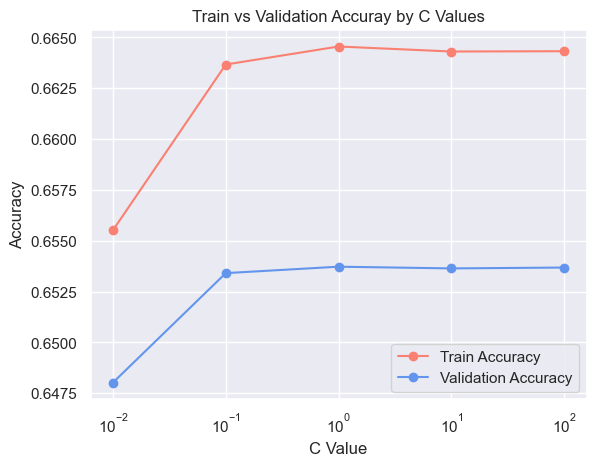

In [16]:
# plotting results of best c search
plt.figure()

plt.plot(c_range, train_acc, color='salmon', marker='o', label='Train Accuracy')
plt.plot(c_range, val_acc, color='cornflowerblue', marker='o', label='Validation Accuracy')
plt.title('Train vs Validation Accuray by C Values')
plt.ylabel('Accuracy')
plt.xlabel('C Value')
plt.xscale('log')

plt.legend()
plt.show()

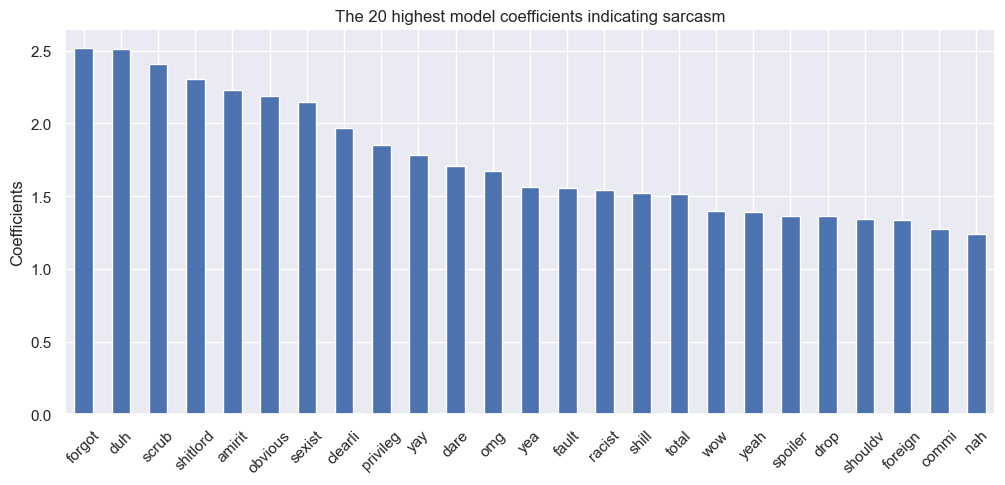

In [17]:
# plotting top sarcasm predictor words
sarcastic_predictors = pd.DataFrame({"coef": logreg.coef_[0,0:]},
    index=logreg.feature_names_in_[0:]).sort_values("coef", ascending=False).head(25)

sarcastic_predictors.plot(kind="bar", figsize=(12, 5), legend=False)
plt.title("The 20 highest model coefficients indicating sarcasm")
plt.ylabel("Coefficients")
plt.xticks(rotation=45)
plt.show()

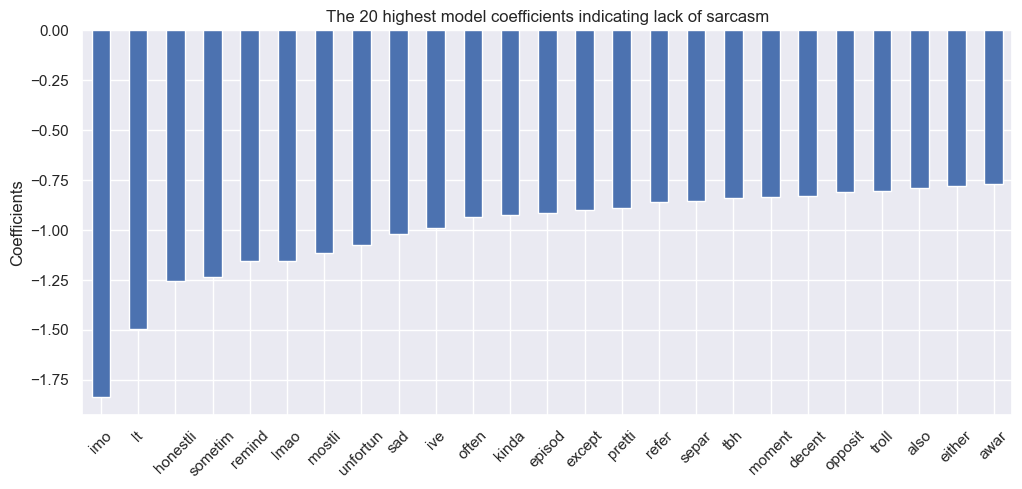

In [18]:
# plotting bottom sarcasm predictor words
non_sarcastic_predictors = pd.DataFrame({"coef": logreg.coef_[0,0:]},
    index=logreg.feature_names_in_[0:]).sort_values("coef", ascending=True).head(25)

non_sarcastic_predictors.plot(kind="bar", figsize=(12, 5), legend=False)
plt.title("The 20 highest model coefficients indicating lack of sarcasm")
plt.ylabel("Coefficients")
plt.xticks(rotation=45)
plt.show()

In [19]:
# using custom tokenizer in TfidfVectorizer
tfidf = TfidfVectorizer(min_df=25,
                        tokenizer=tokenizer, max_features=1500, dtype=np.float32)

tfidf.fit(X_train)# fitting to train

# transforming train, test, val
X_train_tfidf = tfidf.transform(X_train)
X_val_tfidf = tfidf.transform(X_val)
X_test_tfidf = tfidf.transform(X_test)

C:\Users\gravi\anaconda3\envs\sarcasm\lib\site-packages\sklearn\feature_extraction\text.py:524: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


In [20]:
# transforming train to df
train_tfidf = pd.DataFrame(columns= tfidf.get_feature_names_out(), data=X_train_tfidf.toarray())

train_tfidf.head()

,abil,abl,abort,absolut,abus,accept,access,accord,account,accur,across,act,action,activ,actual,ad,add,addict,admit,adult,advic,affect,afford,age,ago,agre,ah,ahead,aim,aint,air,album,alcohol,alien,aliv,allow,almost,alon,along,alreadi,alright,also,altern,alway,amaz,america,american,amirit,amount,amp,angri,anim,announc,annoy,anoth,answer,anymor,anyon,anyth,anyway,apart,app,appar,appear,appl,appli,appreci,appropri,area,arent,argu,argument,arm,armi,armor,around,arrest,art,articl,artist,asian,ask,ass,assault,asshol,assum,atheist,attack,attempt,attent,attract,australia,avail,averag,avoid,aw,awar,away,awesom,b,babi,back,bad,bag,balanc,ball,ban,bank,bar,base,basic,batteri,battl,bear,beat,beauti,becom,beer,begin,behind,believ,benefit,berni,besid,best,bet,beta,better,big,bigger,biggest,bike,bill,bit,bitch,black,blame,blind,block,blood,blow,blue,board,bodi,bomb,book,boot,bore,born,boss,bot,bother,bottl,bottom,bought,bowl,box,boy,brain,brand,break,bring,british,bro,broke,broken,brother,brought,brown,buddi,buff,bug,build,built,bullet,bullshit,bunch,burn,bush,busi,butt,button,buy,c,call,came,camera,camp,campaign,canada,canadian,cancer,candid,cannot,cant,cap,capit,car,card,care,career,carri,case,cash,casual,cat,catch,caught,caus,center,certain,certainli,challeng,champion,chanc,chang,channel,charact,charg,cheap,cheat,check,chees,chicken,child,children,china,chines,choic,choos,christian,christma,church,citi,citizen,civil,claim,class,classic,clean,clear,clearli,click,clinton,close,cloth,club,coach,code,cold,collect,colleg,color,come,comic,comment,commi,commit,common,commun,communist,compani,compar,competit,complain,complet,comput,concern,confirm,confus,connect,conserv,consid,consol,conspiraci,construct,content,continu,contract,contribut,control,convers,convinc,cool,cop,copi,corner,corpor,correct,corrupt,cost,could,couldnt,count,countri,coupl,cours,court,cover,crap,crash,crazi,creat,credit,creepi,cri,crime,crimin,critic,cross,cultur,cup,current,custom,cut,cute,cuz,da,dad,daili,damag,damn,danger,dare,dark,dat,data,date,day,de,dead,deal,death,debat,decent,decid,decis,deck,deep,defend,defens,definit,degre,delet,demand,democraci,democrat,depend,depress,deserv,design,destroy,develop,dick,didnt,die,differ,difficult,direct,dirti,disagre,discuss,disgust,dlc,doctor,doesnt,dog,dollar,donald,donat,done,dont,door,doubl,doubt,download,downvot,draft,dragon,draw,dream,dress,drink,drive,driver,drop,drug,drunk,dude,due,duh,dumb,dunno,e,earli,earth,easi,easier,easili,east,eat,econom,economi,edit,educ,effect,effort,egg,eh,either,elect,els,em,email,emot,employe,end,enemi,energi,engin,english,enjoy,enough,entir,episod,equal,especi,etc,eu,europ,european,even,event,ever,everi,everybodi,everyon,everyth,everywher,evid,evil,exact,exactli,exampl,excel,except,excit,exclus,excus,exist,expect,expens,experi,expert,explain,extra,extrem,eye,f,face,facebook,fact,fail,fair,faith,fake,fall,fals,famili,fan,fantast,far,farm,fast,faster,fat,father,fault,favorit,fear,featur,feed,feel,felt,femal,feminist,field,fight,figur,file,fill,film,filthi,final,find,fine,finger,finish,fire,first,fit,five,fix,flag,flair,fli,flip,folk,follow,food,footbal,forc,foreign,forev,forget,forgot,form,forward,found,four,fox,fp,frame,free,freedom,french,friend,front,fuck,fuckin,full,fun,fund,funni,futur,g,ga,gain,game,garbag,gave,gay,gb,gear,gender,gener,german,germani,get,giant,gif,girl,girlfriend,give,given,glad,glass,global,go,goal,god,goe,gold,gone,gonna,good,googl,got,gotta,gotten,govern,grab,graphic,great,greatest,green,ground,group,grow,guess,guilti,gun,guy,ha,hack,haha,hair,half,hand,handl,hang,happen,happi,hard,harder,hasnt,hat,hate,havent,he,head,health,healthi,hear,heard,heart,heat,hed,hell,help,hero,hey,hide,high,higher,hilari,hillari,hire,histori,hit,hitler,hmm,hold,hole,holi,home,honest,honestli,hope,horribl,hot,hour,hous,huge,huh,human,hurt,hype,ice,id,idea,idiot,idk,ignor,ill,illeg,im,imag,imagin,immedi,immigr,imo,impli,import,imposs,impress,improv,includ,increas,incred,inde,individu,industri,in

In [21]:
# val to df
val_tfidf = pd.DataFrame(columns= tfidf.get_feature_names_out(), data=X_val_tfidf.toarray())

val_tfidf.head()

,abil,abl,abort,absolut,abus,accept,access,accord,account,accur,across,act,action,activ,actual,ad,add,addict,admit,adult,advic,affect,afford,age,ago,agre,ah,ahead,aim,aint,air,album,alcohol,alien,aliv,allow,almost,alon,along,alreadi,alright,also,altern,alway,amaz,america,american,amirit,amount,amp,angri,anim,announc,annoy,anoth,answer,anymor,anyon,anyth,anyway,apart,app,appar,appear,appl,appli,appreci,appropri,area,arent,argu,argument,arm,armi,armor,around,arrest,art,articl,artist,asian,ask,ass,assault,asshol,assum,atheist,attack,attempt,attent,attract,australia,avail,averag,avoid,aw,awar,away,awesom,b,babi,back,bad,bag,balanc,ball,ban,bank,bar,base,basic,batteri,battl,bear,beat,beauti,becom,beer,begin,behind,believ,benefit,berni,besid,best,bet,beta,better,big,bigger,biggest,bike,bill,bit,bitch,black,blame,blind,block,blood,blow,blue,board,bodi,bomb,book,boot,bore,born,boss,bot,bother,bottl,bottom,bought,bowl,box,boy,brain,brand,break,bring,british,bro,broke,broken,brother,brought,brown,buddi,buff,bug,build,built,bullet,bullshit,bunch,burn,bush,busi,butt,button,buy,c,call,came,camera,camp,campaign,canada,canadian,cancer,candid,cannot,cant,cap,capit,car,card,care,career,carri,case,cash,casual,cat,catch,caught,caus,center,certain,certainli,challeng,champion,chanc,chang,channel,charact,charg,cheap,cheat,check,chees,chicken,child,children,china,chines,choic,choos,christian,christma,church,citi,citizen,civil,claim,class,classic,clean,clear,clearli,click,clinton,close,cloth,club,coach,code,cold,collect,colleg,color,come,comic,comment,commi,commit,common,commun,communist,compani,compar,competit,complain,complet,comput,concern,confirm,confus,connect,conserv,consid,consol,conspiraci,construct,content,continu,contract,contribut,control,convers,convinc,cool,cop,copi,corner,corpor,correct,corrupt,cost,could,couldnt,count,countri,coupl,cours,court,cover,crap,crash,crazi,creat,credit,creepi,cri,crime,crimin,critic,cross,cultur,cup,current,custom,cut,cute,cuz,da,dad,daili,damag,damn,danger,dare,dark,dat,data,date,day,de,dead,deal,death,debat,decent,decid,decis,deck,deep,defend,defens,definit,degre,delet,demand,democraci,democrat,depend,depress,deserv,design,destroy,develop,dick,didnt,die,differ,difficult,direct,dirti,disagre,discuss,disgust,dlc,doctor,doesnt,dog,dollar,donald,donat,done,dont,door,doubl,doubt,download,downvot,draft,dragon,draw,dream,dress,drink,drive,driver,drop,drug,drunk,dude,due,duh,dumb,dunno,e,earli,earth,easi,easier,easili,east,eat,econom,economi,edit,educ,effect,effort,egg,eh,either,elect,els,em,email,emot,employe,end,enemi,energi,engin,english,enjoy,enough,entir,episod,equal,especi,etc,eu,europ,european,even,event,ever,everi,everybodi,everyon,everyth,everywher,evid,evil,exact,exactli,exampl,excel,except,excit,exclus,excus,exist,expect,expens,experi,expert,explain,extra,extrem,eye,f,face,facebook,fact,fail,fair,faith,fake,fall,fals,famili,fan,fantast,far,farm,fast,faster,fat,father,fault,favorit,fear,featur,feed,feel,felt,femal,feminist,field,fight,figur,file,fill,film,filthi,final,find,fine,finger,finish,fire,first,fit,five,fix,flag,flair,fli,flip,folk,follow,food,footbal,forc,foreign,forev,forget,forgot,form,forward,found,four,fox,fp,frame,free,freedom,french,friend,front,fuck,fuckin,full,fun,fund,funni,futur,g,ga,gain,game,garbag,gave,gay,gb,gear,gender,gener,german,germani,get,giant,gif,girl,girlfriend,give,given,glad,glass,global,go,goal,god,goe,gold,gone,gonna,good,googl,got,gotta,gotten,govern,grab,graphic,great,greatest,green,ground,group,grow,guess,guilti,gun,guy,ha,hack,haha,hair,half,hand,handl,hang,happen,happi,hard,harder,hasnt,hat,hate,havent,he,head,health,healthi,hear,heard,heart,heat,hed,hell,help,hero,hey,hide,high,higher,hilari,hillari,hire,histori,hit,hitler,hmm,hold,hole,holi,home,honest,honestli,hope,horribl,hot,hour,hous,huge,huh,human,hurt,hype,ice,id,idea,idiot,idk,ignor,ill,illeg,im,imag,imagin,immedi,immigr,imo,impli,import,imposs,impress,improv,includ,increas,incred,inde,individu,industri,in

In [22]:
# test to df
test_tfidf = pd.DataFrame(columns= tfidf.get_feature_names_out(), data=X_test_tfidf.toarray())

test_tfidf.head()

,abil,abl,abort,absolut,abus,accept,access,accord,account,accur,across,act,action,activ,actual,ad,add,addict,admit,adult,advic,affect,afford,age,ago,agre,ah,ahead,aim,aint,air,album,alcohol,alien,aliv,allow,almost,alon,along,alreadi,alright,also,altern,alway,amaz,america,american,amirit,amount,amp,angri,anim,announc,annoy,anoth,answer,anymor,anyon,anyth,anyway,apart,app,appar,appear,appl,appli,appreci,appropri,area,arent,argu,argument,arm,armi,armor,around,arrest,art,articl,artist,asian,ask,ass,assault,asshol,assum,atheist,attack,attempt,attent,attract,australia,avail,averag,avoid,aw,awar,away,awesom,b,babi,back,bad,bag,balanc,ball,ban,bank,bar,base,basic,batteri,battl,bear,beat,beauti,becom,beer,begin,behind,believ,benefit,berni,besid,best,bet,beta,better,big,bigger,biggest,bike,bill,bit,bitch,black,blame,blind,block,blood,blow,blue,board,bodi,bomb,book,boot,bore,born,boss,bot,bother,bottl,bottom,bought,bowl,box,boy,brain,brand,break,bring,british,bro,broke,broken,brother,brought,brown,buddi,buff,bug,build,built,bullet,bullshit,bunch,burn,bush,busi,butt,button,buy,c,call,came,camera,camp,campaign,canada,canadian,cancer,candid,cannot,cant,cap,capit,car,card,care,career,carri,case,cash,casual,cat,catch,caught,caus,center,certain,certainli,challeng,champion,chanc,chang,channel,charact,charg,cheap,cheat,check,chees,chicken,child,children,china,chines,choic,choos,christian,christma,church,citi,citizen,civil,claim,class,classic,clean,clear,clearli,click,clinton,close,cloth,club,coach,code,cold,collect,colleg,color,come,comic,comment,commi,commit,common,commun,communist,compani,compar,competit,complain,complet,comput,concern,confirm,confus,connect,conserv,consid,consol,conspiraci,construct,content,continu,contract,contribut,control,convers,convinc,cool,cop,copi,corner,corpor,correct,corrupt,cost,could,couldnt,count,countri,coupl,cours,court,cover,crap,crash,crazi,creat,credit,creepi,cri,crime,crimin,critic,cross,cultur,cup,current,custom,cut,cute,cuz,da,dad,daili,damag,damn,danger,dare,dark,dat,data,date,day,de,dead,deal,death,debat,decent,decid,decis,deck,deep,defend,defens,definit,degre,delet,demand,democraci,democrat,depend,depress,deserv,design,destroy,develop,dick,didnt,die,differ,difficult,direct,dirti,disagre,discuss,disgust,dlc,doctor,doesnt,dog,dollar,donald,donat,done,dont,door,doubl,doubt,download,downvot,draft,dragon,draw,dream,dress,drink,drive,driver,drop,drug,drunk,dude,due,duh,dumb,dunno,e,earli,earth,easi,easier,easili,east,eat,econom,economi,edit,educ,effect,effort,egg,eh,either,elect,els,em,email,emot,employe,end,enemi,energi,engin,english,enjoy,enough,entir,episod,equal,especi,etc,eu,europ,european,even,event,ever,everi,everybodi,everyon,everyth,everywher,evid,evil,exact,exactli,exampl,excel,except,excit,exclus,excus,exist,expect,expens,experi,expert,explain,extra,extrem,eye,f,face,facebook,fact,fail,fair,faith,fake,fall,fals,famili,fan,fantast,far,farm,fast,faster,fat,father,fault,favorit,fear,featur,feed,feel,felt,femal,feminist,field,fight,figur,file,fill,film,filthi,final,find,fine,finger,finish,fire,first,fit,five,fix,flag,flair,fli,flip,folk,follow,food,footbal,forc,foreign,forev,forget,forgot,form,forward,found,four,fox,fp,frame,free,freedom,french,friend,front,fuck,fuckin,full,fun,fund,funni,futur,g,ga,gain,game,garbag,gave,gay,gb,gear,gender,gener,german,germani,get,giant,gif,girl,girlfriend,give,given,glad,glass,global,go,goal,god,goe,gold,gone,gonna,good,googl,got,gotta,gotten,govern,grab,graphic,great,greatest,green,ground,group,grow,guess,guilti,gun,guy,ha,hack,haha,hair,half,hand,handl,hang,happen,happi,hard,harder,hasnt,hat,hate,havent,he,head,health,healthi,hear,heard,heart,heat,hed,hell,help,hero,hey,hide,high,higher,hilari,hillari,hire,histori,hit,hitler,hmm,hold,hole,holi,home,honest,honestli,hope,horribl,hot,hour,hous,huge,huh,human,hurt,hype,ice,id,idea,idiot,idk,ignor,ill,illeg,im,imag,imagin,immedi,immigr,imo,impli,import,imposs,impress,improv,includ,increas,incred,inde,individu,industri,in

In [23]:
# instantiating tfidf logreg
tfidf_logreg = LogisticRegression(max_iter=5000, random_state=42)

# fitting to train
tfidf_logreg.fit(train_tfidf, y_train)

# scoring train and validation
print(f'Train score: {tfidf_logreg.score(train_tfidf, y_train)}')
print(f'Val score: {tfidf_logreg.score(val_tfidf, y_val)}')

Train score: 0.6637046105353512
Val score: 0.6530035037359112


In [24]:
# vectorizers which we will pass into FeatureUnion with unique prefixes
vectorizers = [('count_vect', CountVectorizer(min_df=25, tokenizer=tokenizer, max_features=750)),
               ('tfidf', TfidfVectorizer(min_df=25, tokenizer=tokenizer, max_features=750))]

# Creating feature union
featunion = FeatureUnion(vectorizers)

# Fitting and transforming train,test,val
train_tokens = featunion.fit_transform(X_train)
val_tokens = featunion.transform(X_val)
test_tokens = featunion.transform(X_test)





In [25]:
# turning train into dataframe
train_union = pd.DataFrame(data=train_tokens.todense(), columns=featunion.get_feature_names_out())

#confirming result
train_union.head()

,count_vect__abl,count_vect__absolut,count_vect__accept,count_vect__account,count_vect__act,count_vect__action,count_vect__actual,count_vect__ad,count_vect__add,count_vect__age,count_vect__ago,count_vect__agre,count_vect__ah,count_vect__allow,count_vect__almost,count_vect__alreadi,count_vect__also,count_vect__alway,count_vect__amaz,count_vect__america,count_vect__american,count_vect__amount,count_vect__amp,count_vect__anim,count_vect__anoth,count_vect__answer,count_vect__anymor,count_vect__anyon,count_vect__anyth,count_vect__anyway,count_vect__appar,count_vect__appl,count_vect__area,count_vect__arent,count_vect__argument,count_vect__arm,count_vect__around,count_vect__articl,count_vect__ask,count_vect__ass,count_vect__asshol,count_vect__assum,count_vect__attack,count_vect__away,count_vect__awesom,count_vect__babi,count_vect__back,count_vect__bad,count_vect__ball,count_vect__ban,count_vect__base,count_vect__basic,count_vect__beat,count_vect__beauti,count_vect__becom,count_vect__behind,count_vect__believ,count_vect__berni,count_vect__best,count_vect__bet,count_vect__better,count_vect__big,count_vect__bit,count_vect__bitch,count_vect__black,count_vect__blame,count_vect__blue,count_vect__bodi,count_vect__book,count_vect__bought,count_vect__box,count_vect__boy,count_vect__break,count_vect__bring,count_vect__bro,count_vect__brother,count_vect__build,count_vect__bullshit,count_vect__bunch,count_vect__burn,count_vect__busi,count_vect__buy,count_vect__c,count_vect__call,count_vect__came,count_vect__cant,count_vect__car,count_vect__card,count_vect__care,count_vect__carri,count_vect__case,count_vect__cat,count_vect__catch,count_vect__caus,count_vect__certainli,count_vect__chanc,count_vect__chang,count_vect__charact,count_vect__charg,count_vect__check,count_vect__child,count_vect__children,count_vect__choic,count_vect__christian,count_vect__citi,count_vect__claim,count_vect__class,count_vect__clear,count_vect__clearli,count_vect__clinton,count_vect__close,count_vect__colleg,count_vect__color,count_vect__come,count_vect__comment,count_vect__commun,count_vect__compani,count_vect__compar,count_vect__complain,count_vect__complet,count_vect__comput,count_vect__confirm,count_vect__consid,count_vect__content,count_vect__control,count_vect__cool,count_vect__cop,count_vect__correct,count_vect__cost,count_vect__could,count_vect__couldnt,count_vect__count,count_vect__countri,count_vect__coupl,count_vect__cours,count_vect__cover,count_vect__crazi,count_vect__creat,count_vect__crime,count_vect__cultur,count_vect__current,count_vect__cut,count_vect__damag,count_vect__damn,count_vect__dare,count_vect__date,count_vect__day,count_vect__dead,count_vect__deal,count_vect__death,count_vect__decid,count_vect__defens,count_vect__definit,count_vect__democrat,count_vect__deserv,count_vect__design,count_vect__destroy,count_vect__develop,count_vect__dick,count_vect__didnt,count_vect__die,count_vect__differ,count_vect__doesnt,count_vect__dog,count_vect__dollar,count_vect__done,count_vect__dont,count_vect__doubt,count_vect__downvot,count_vect__drink,count_vect__drive,count_vect__driver,count_vect__drop,count_vect__drug,count_vect__dude,count_vect__due,count_vect__duh,count_vect__dumb,count_vect__e,count_vect__earth,count_vect__easi,count_vect__easier,count_vect__eat,count_vect__effect,count_vect__either,count_vect__elect,count_vect__els,count_vect__end,count_vect__enemi,count_vect__engin,count_vect__english,count_vect__enjoy,count_vect__enough,count_vect__entir,count_vect__equal,count_vect__especi,count_vect__etc,count_vect__even,count_vect__ever,count_vect__everi,count_vect__everyon,count_vect__everyth,count_vect__evid,count_vect__evil,count_vect__exactli,count_vect__exampl,count_vect__except,count_vect__exist,count_vect__expect,count_vect__experi,count_vect__explain,count_vect__extra,count_vect__eye,count_vect__f,count_vect__face,count_vect__fact,count_vect__fail,count_vect__fair,count_vect__fake,count_vect__fall,count_vect__famili,count_vect__fan,count_vect__far,co

In [26]:
# checking shape
train_union.shape

(142131, 1500)

In [27]:
# validation into dataframe
val_union = pd.DataFrame(data=val_tokens.todense(), columns=featunion.get_feature_names_out())

val_union.head()

,count_vect__abl,count_vect__absolut,count_vect__accept,count_vect__account,count_vect__act,count_vect__action,count_vect__actual,count_vect__ad,count_vect__add,count_vect__age,count_vect__ago,count_vect__agre,count_vect__ah,count_vect__allow,count_vect__almost,count_vect__alreadi,count_vect__also,count_vect__alway,count_vect__amaz,count_vect__america,count_vect__american,count_vect__amount,count_vect__amp,count_vect__anim,count_vect__anoth,count_vect__answer,count_vect__anymor,count_vect__anyon,count_vect__anyth,count_vect__anyway,count_vect__appar,count_vect__appl,count_vect__area,count_vect__arent,count_vect__argument,count_vect__arm,count_vect__around,count_vect__articl,count_vect__ask,count_vect__ass,count_vect__asshol,count_vect__assum,count_vect__attack,count_vect__away,count_vect__awesom,count_vect__babi,count_vect__back,count_vect__bad,count_vect__ball,count_vect__ban,count_vect__base,count_vect__basic,count_vect__beat,count_vect__beauti,count_vect__becom,count_vect__behind,count_vect__believ,count_vect__berni,count_vect__best,count_vect__bet,count_vect__better,count_vect__big,count_vect__bit,count_vect__bitch,count_vect__black,count_vect__blame,count_vect__blue,count_vect__bodi,count_vect__book,count_vect__bought,count_vect__box,count_vect__boy,count_vect__break,count_vect__bring,count_vect__bro,count_vect__brother,count_vect__build,count_vect__bullshit,count_vect__bunch,count_vect__burn,count_vect__busi,count_vect__buy,count_vect__c,count_vect__call,count_vect__came,count_vect__cant,count_vect__car,count_vect__card,count_vect__care,count_vect__carri,count_vect__case,count_vect__cat,count_vect__catch,count_vect__caus,count_vect__certainli,count_vect__chanc,count_vect__chang,count_vect__charact,count_vect__charg,count_vect__check,count_vect__child,count_vect__children,count_vect__choic,count_vect__christian,count_vect__citi,count_vect__claim,count_vect__class,count_vect__clear,count_vect__clearli,count_vect__clinton,count_vect__close,count_vect__colleg,count_vect__color,count_vect__come,count_vect__comment,count_vect__commun,count_vect__compani,count_vect__compar,count_vect__complain,count_vect__complet,count_vect__comput,count_vect__confirm,count_vect__consid,count_vect__content,count_vect__control,count_vect__cool,count_vect__cop,count_vect__correct,count_vect__cost,count_vect__could,count_vect__couldnt,count_vect__count,count_vect__countri,count_vect__coupl,count_vect__cours,count_vect__cover,count_vect__crazi,count_vect__creat,count_vect__crime,count_vect__cultur,count_vect__current,count_vect__cut,count_vect__damag,count_vect__damn,count_vect__dare,count_vect__date,count_vect__day,count_vect__dead,count_vect__deal,count_vect__death,count_vect__decid,count_vect__defens,count_vect__definit,count_vect__democrat,count_vect__deserv,count_vect__design,count_vect__destroy,count_vect__develop,count_vect__dick,count_vect__didnt,count_vect__die,count_vect__differ,count_vect__doesnt,count_vect__dog,count_vect__dollar,count_vect__done,count_vect__dont,count_vect__doubt,count_vect__downvot,count_vect__drink,count_vect__drive,count_vect__driver,count_vect__drop,count_vect__drug,count_vect__dude,count_vect__due,count_vect__duh,count_vect__dumb,count_vect__e,count_vect__earth,count_vect__easi,count_vect__easier,count_vect__eat,count_vect__effect,count_vect__either,count_vect__elect,count_vect__els,count_vect__end,count_vect__enemi,count_vect__engin,count_vect__english,count_vect__enjoy,count_vect__enough,count_vect__entir,count_vect__equal,count_vect__especi,count_vect__etc,count_vect__even,count_vect__ever,count_vect__everi,count_vect__everyon,count_vect__everyth,count_vect__evid,count_vect__evil,count_vect__exactli,count_vect__exampl,count_vect__except,count_vect__exist,count_vect__expect,count_vect__experi,count_vect__explain,count_vect__extra,count_vect__eye,count_vect__f,count_vect__face,count_vect__fact,count_vect__fail,count_vect__fair,count_vect__fake,count_vect__fall,count_vect__famili,count_vect__fan,count_vect__far,co

In [28]:
# test into dataframe
test_union = pd.DataFrame(data = test_tokens.todense(), columns = featunion.get_feature_names_out())

test_union.head()

,count_vect__abl,count_vect__absolut,count_vect__accept,count_vect__account,count_vect__act,count_vect__action,count_vect__actual,count_vect__ad,count_vect__add,count_vect__age,count_vect__ago,count_vect__agre,count_vect__ah,count_vect__allow,count_vect__almost,count_vect__alreadi,count_vect__also,count_vect__alway,count_vect__amaz,count_vect__america,count_vect__american,count_vect__amount,count_vect__amp,count_vect__anim,count_vect__anoth,count_vect__answer,count_vect__anymor,count_vect__anyon,count_vect__anyth,count_vect__anyway,count_vect__appar,count_vect__appl,count_vect__area,count_vect__arent,count_vect__argument,count_vect__arm,count_vect__around,count_vect__articl,count_vect__ask,count_vect__ass,count_vect__asshol,count_vect__assum,count_vect__attack,count_vect__away,count_vect__awesom,count_vect__babi,count_vect__back,count_vect__bad,count_vect__ball,count_vect__ban,count_vect__base,count_vect__basic,count_vect__beat,count_vect__beauti,count_vect__becom,count_vect__behind,count_vect__believ,count_vect__berni,count_vect__best,count_vect__bet,count_vect__better,count_vect__big,count_vect__bit,count_vect__bitch,count_vect__black,count_vect__blame,count_vect__blue,count_vect__bodi,count_vect__book,count_vect__bought,count_vect__box,count_vect__boy,count_vect__break,count_vect__bring,count_vect__bro,count_vect__brother,count_vect__build,count_vect__bullshit,count_vect__bunch,count_vect__burn,count_vect__busi,count_vect__buy,count_vect__c,count_vect__call,count_vect__came,count_vect__cant,count_vect__car,count_vect__card,count_vect__care,count_vect__carri,count_vect__case,count_vect__cat,count_vect__catch,count_vect__caus,count_vect__certainli,count_vect__chanc,count_vect__chang,count_vect__charact,count_vect__charg,count_vect__check,count_vect__child,count_vect__children,count_vect__choic,count_vect__christian,count_vect__citi,count_vect__claim,count_vect__class,count_vect__clear,count_vect__clearli,count_vect__clinton,count_vect__close,count_vect__colleg,count_vect__color,count_vect__come,count_vect__comment,count_vect__commun,count_vect__compani,count_vect__compar,count_vect__complain,count_vect__complet,count_vect__comput,count_vect__confirm,count_vect__consid,count_vect__content,count_vect__control,count_vect__cool,count_vect__cop,count_vect__correct,count_vect__cost,count_vect__could,count_vect__couldnt,count_vect__count,count_vect__countri,count_vect__coupl,count_vect__cours,count_vect__cover,count_vect__crazi,count_vect__creat,count_vect__crime,count_vect__cultur,count_vect__current,count_vect__cut,count_vect__damag,count_vect__damn,count_vect__dare,count_vect__date,count_vect__day,count_vect__dead,count_vect__deal,count_vect__death,count_vect__decid,count_vect__defens,count_vect__definit,count_vect__democrat,count_vect__deserv,count_vect__design,count_vect__destroy,count_vect__develop,count_vect__dick,count_vect__didnt,count_vect__die,count_vect__differ,count_vect__doesnt,count_vect__dog,count_vect__dollar,count_vect__done,count_vect__dont,count_vect__doubt,count_vect__downvot,count_vect__drink,count_vect__drive,count_vect__driver,count_vect__drop,count_vect__drug,count_vect__dude,count_vect__due,count_vect__duh,count_vect__dumb,count_vect__e,count_vect__earth,count_vect__easi,count_vect__easier,count_vect__eat,count_vect__effect,count_vect__either,count_vect__elect,count_vect__els,count_vect__end,count_vect__enemi,count_vect__engin,count_vect__english,count_vect__enjoy,count_vect__enough,count_vect__entir,count_vect__equal,count_vect__especi,count_vect__etc,count_vect__even,count_vect__ever,count_vect__everi,count_vect__everyon,count_vect__everyth,count_vect__evid,count_vect__evil,count_vect__exactli,count_vect__exampl,count_vect__except,count_vect__exist,count_vect__expect,count_vect__experi,count_vect__explain,count_vect__extra,count_vect__eye,count_vect__f,count_vect__face,count_vect__fact,count_vect__fail,count_vect__fair,count_vect__fake,count_vect__fall,count_vect__famili,count_vect__fan,count_vect__far,co

In [29]:
# running logreg on both CountVectorizer and TFIDF together
union_logreg = LogisticRegression(max_iter=5000, random_state=42)

union_logreg.fit(train_union, y_train)

print(f'Train Score: {union_logreg.score(train_union, y_train)}')
print(f'Validation Score: {union_logreg.score(val_union, y_val)}')


Train Score: 0.6605525888089158
Validation Score: 0.6463548482418
